C:\Users\NoteBook\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0, 0.5, '특성 1')

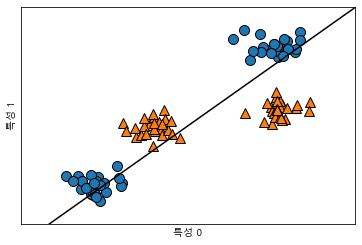

In [32]:
from sklearn.svm import LinearSVC
import mglearn
import matplotlib.pyplot as plt
from mglearn.datasets import make_blobs
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
%matplotlib inline

X, y = make_blobs(centers=4, random_state=8)
y = y % 2
linear_svm = LinearSVC().fit(X, y)


mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0],X[:,1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

C:\Users\NoteBook\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NoteBook\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


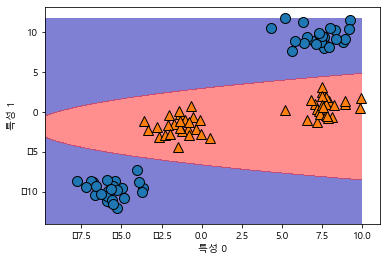

In [30]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
import numpy as np
figure = plt.figure()

X_new = np.hstack([X, X[:, 1:] ** 2])

linear_svm_3d = LinearSVC(max_iter=5000).fit(X_new, y)

xx = np.linspace(X_new[:, 0].min() - 2,X_new[:, 0].max(),50)
yy = np.linspace(X_new[:, 1].min() - 2,X_new[:, 1].max(),50)
XX, YY = np.meshgrid(xx, yy)

ZZ =YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 0.90
테스트 세트 정확도: 0.94


In [47]:
#데이터 전처리

#훈련 세트에서 특성별 최소값 계산
min_on_training = X_train.min(axis=0)
#훈련 세트에서 특성별 (최대값 - 최소값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

#훈련 데이터에 최소값을 빼고 범위로 나누면 각 특성에 대해 최소값음 0, 최대값은 1
X_train_scaled = (X_train - min_on_training) / range_on_training

# 테스트 세트에도 같은 작업을 적용 훈련 세트에서 계산한 최솟값과 범위를 사용
X_test_scaled = (X_test - min_on_training) / range_on_training

# 전처리 후 SVC
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

# C가 클수록 제약완화

# SVC 장단점

# 장점
# 강력하며 여러 종류의 데이터셋에 적용가능
# 특성이 적을 때 에도 복잡한 결정 경계 만듬(커널트릭)
# 저차원 고차원에 모두 잘 맞음

#단점
# 샘플이 많을 경우에 느림 ( > 100000)
# 데이터 전처리와 매개변수에 민감
# 분석하기 어렵고 설명하기 어려움

훈련 세트 정확도: 0.984
테스트 세트 정확도: 0.972
훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.958
